https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [2]:
pip install flair

     |████████████████████████████████| 284 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 31.8 MB/s 
     |████████████████████████████████| 788 kB 34.0 MB/s 
     |████████████████████████████████| 981 kB 43.4 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 2.6 MB 75.0 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 893 kB/s 
     |████████████████████████████████| 3.3 MB 30.6 MB/s 
     |████████████████████████████████| 636 kB 43.8 MB/s 
     |████████████████████████████████| 895 kB 62.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=4fcf498caf3fe8f6be245344bfa2a7a68f575b511ecd

# Rule based Sentiment Analysis
using TextBlob, VADER, SentiWordNet

### Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dataset

In [5]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('drive/MyDrive/bbc_sent_final.csv')
data.head()

,text,sent
0,Psychiatrists are being urged to ask children ...,0
1,The number of adults seeking help to cope with...,-1
2,The current system of checking newborns for hi...,-1
3,Calorie-filled Easter eggs are being sold in s...,-1
4,"""She is so desperate to end it all, she curren...",-1


### Step 1: Cleaning the text

In [6]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['clean_text'] =data['text'].apply(clean)
data.head()

,text,sent,clean_text
0,Psychiatrists are being urged to ask children ...,0,Psychiatrists are being urged to ask children ...
1,The number of adults seeking help to cope with...,-1,The number of adults seeking help to cope with...
2,The current system of checking newborns for hi...,-1,The current system of checking newborns for hi...
3,Calorie-filled Easter eggs are being sold in s...,-1,Calorie filled Easter eggs are being sold in s...
4,"""She is so desperate to end it all, she curren...",-1,She is so desperate to end it all she current...


### Steps 2-4: Tokenization, POS tagging, stopwords removal

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS_tagged'] = data['clean_text'].apply(token_stop_pos)

# mydata['POS tagged'][0]

In [10]:
data.head()

,text,sent,clean_text,POS_tagged
0,Psychiatrists are being urged to ask children ...,0,Psychiatrists are being urged to ask children ...,"[(Psychiatrists, n), (urged, v), (ask, v), (ch..."
1,The number of adults seeking help to cope with...,-1,The number of adults seeking help to cope with...,"[(number, n), (adults, n), (seeking, v), (help..."
2,The current system of checking newborns for hi...,-1,The current system of checking newborns for hi...,"[(current, a), (system, n), (checking, v), (ne..."
3,Calorie-filled Easter eggs are being sold in s...,-1,Calorie filled Easter eggs are being sold in s...,"[(Calorie, n), (filled, v), (Easter, n), (eggs..."
4,"""She is so desperate to end it all, she curren...",-1,She is so desperate to end it all she current...,"[(desperate, a), (end, v), (currently, r), (to..."


### Step 5: Obtaining the stem words

#### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['POS_tagged'].apply(lemmatize)
data.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,text,sent,clean_text,POS_tagged,Lemma
0,Psychiatrists are being urged to ask children ...,0,Psychiatrists are being urged to ask children ...,"[(Psychiatrists, n), (urged, v), (ask, v), (ch...",Psychiatrists urge ask child mental health i...
1,The number of adults seeking help to cope with...,-1,The number of adults seeking help to cope with...,"[(number, n), (adults, n), (seeking, v), (help...",number adult seek help cope alcoholic parent...
2,The current system of checking newborns for hi...,-1,The current system of checking newborns for hi...,"[(current, a), (system, n), (checking, v), (ne...",current system check newborn hip problem fai...
3,Calorie-filled Easter eggs are being sold in s...,-1,Calorie filled Easter eggs are being sold in s...,"[(Calorie, n), (filled, v), (Easter, n), (eggs...",Calorie fill Easter egg sell shop far early ...
4,"""She is so desperate to end it all, she curren...",-1,She is so desperate to end it all she current...,"[(desperate, a), (end, v), (currently, r), (to...",desperate end currently toothbrush inside Ja...


# Sentiment analysis using TextBlob

In [13]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
fin_data = pd.DataFrame(data[['text', 'Lemma']])

In [15]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis
0,Psychiatrists are being urged to ask children ...,Psychiatrists urge ask child mental health i...,0.002137,Positive
1,The number of adults seeking help to cope with...,number adult seek help cope alcoholic parent...,-0.065316,Negative
2,The current system of checking newborns for hi...,current system check newborn hip problem fai...,-0.059900,Negative
3,Calorie-filled Easter eggs are being sold in s...,Calorie fill Easter egg sell shop far early ...,0.037837,Positive
4,"""She is so desperate to end it all, she curren...",desperate end currently toothbrush inside Ja...,-0.001690,Negative


In [16]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    86
Negative    13
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f33b88e51d0>,
 [Text(-1.0077192839892757, 0.4410236327864319, 'Positive'),
  Text(1.0077192633434682, -0.44102367996117625, 'Negative')],
 [Text(-0.5496650639941504, 0.24055834515623556, '86.9%'),
  Text(0.5496650527328008, -0.24055837088791426, '13.1%')])

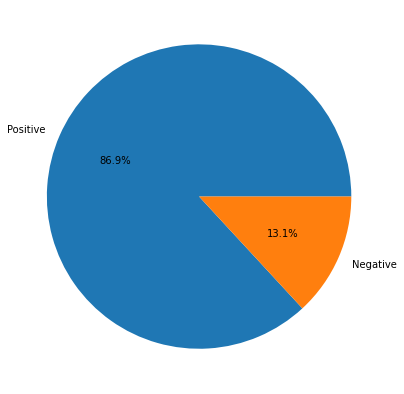

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment analysis using VADER

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
sia = SIA()


# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = sia.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Psychiatrists are being urged to ask children ...,Psychiatrists urge ask child mental health i...,0.002137,Positive,-0.9764,Negative
1,The number of adults seeking help to cope with...,number adult seek help cope alcoholic parent...,-0.065316,Negative,-0.8856,Negative
2,The current system of checking newborns for hi...,current system check newborn hip problem fai...,-0.059900,Negative,-0.9864,Negative
3,Calorie-filled Easter eggs are being sold in s...,Calorie fill Easter egg sell shop far early ...,0.037837,Positive,0.9246,Positive
4,"""She is so desperate to end it all, she curren...",desperate end currently toothbrush inside Ja...,-0.001690,Negative,-0.7827,Negative


In [20]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    52
Negative    42
Neutral      5
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f33b8a1cb50>,
 [Text(-0.09509993238994095, 1.1962257324014682, 'Positive'),
  Text(-0.0871749380241128, -1.0965402547013459, 'Negative'),
  Text(1.0861827862144668, -0.1738014813843021, 'Neutral')],
 [Text(-0.05547496056079889, 0.6977983439008564, '52.5%'),
  Text(-0.047549966194970615, -0.598112866200734, '42.4%'),
  Text(0.5924633379351637, -0.09480080802780114, '5.1%')])

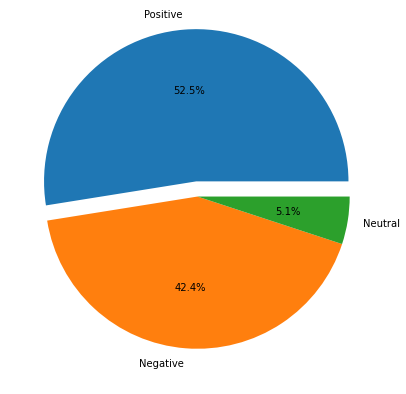

In [21]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment Analysis using SentiWordNet

In [22]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = data['POS_tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Psychiatrists are being urged to ask children ...,Psychiatrists urge ask child mental health i...,0.002137,Positive,-0.9764,Negative,Positive
1,The number of adults seeking help to cope with...,number adult seek help cope alcoholic parent...,-0.065316,Negative,-0.8856,Negative,Negative
2,The current system of checking newborns for hi...,current system check newborn hip problem fai...,-0.059900,Negative,-0.9864,Negative,Negative
3,Calorie-filled Easter eggs are being sold in s...,Calorie fill Easter egg sell shop far early ...,0.037837,Positive,0.9246,Positive,Negative
4,"""She is so desperate to end it all, she curren...",desperate end currently toothbrush inside Ja...,-0.001690,Negative,-0.7827,Negative,Negative


In [23]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    73
Negative    25
Neutral      1
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f33b19ba050>,
 [Text(-0.8142112171712897, 0.8815101212308608, 'Positive'),
  Text(0.7203466304438425, -0.8313246850708828, 'Negative'),
  Text(1.099446187840713, -0.03490100346013218, 'Neutral')],
 [Text(-0.474956543349919, 0.5142142373846688, '73.7%'),
  Text(0.3929163438784595, -0.45344982822048147, '25.3%'),
  Text(0.5996979206403887, -0.019036910978253916, '1.0%')])

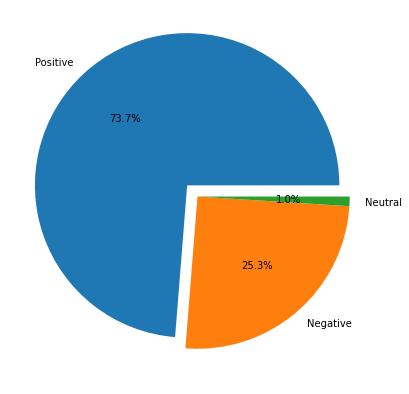

In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

In [25]:
def change_label(sent):
  if sent == 0:
    return "Neutral"
  elif sent == 1:
    return "Positive"
  elif sent == -1:
    return "Negative"

In [26]:
data['sent']=data.sent.apply(change_label)

In [27]:
label_counts= data['sent'].value_counts()

([<matplotlib.patches.Wedge at 0x7f33b198e7d0>,
 [Text(0.5667253217379322, 1.0577440189861806, 'Neutral'),
  Text(-1.0977853461644442, -0.06976627943793239, 'Positive'),
  Text(0.5799480152555193, -0.934697972395995, 'Negative')],
 [Text(0.3305897710137937, 0.6170173444086052, '34.3%'),
  Text(-0.5987920069987877, -0.0380543342388722, '33.3%'),
  Text(0.31633528104846503, -0.5098352576705426, '32.3%')])

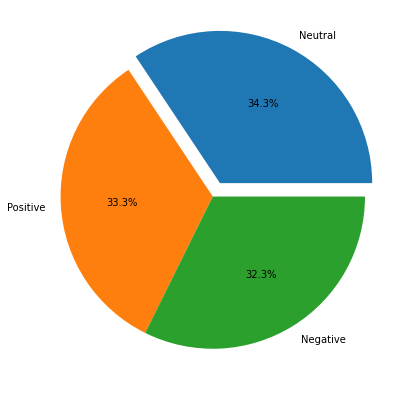

In [28]:
plt.figure(figsize=(10, 7))
plt.pie(label_counts.values, labels = label_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

# Flair

In [30]:
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single

In [39]:
classifier = TextClassifier.load('en-sentiment')

2021-08-16 13:46:48,414 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpx_vjk62j


100%|██████████| 265512723/265512723 [00:10<00:00, 24578110.12B/s]

2021-08-16 13:46:59,556 copying /tmp/tmpx_vjk62j to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-08-16 13:47:00,607 removing temp file /tmp/tmpx_vjk62j
2021-08-16 13:47:02,401 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

In [31]:
def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

In [32]:
def flair_predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

In [37]:
def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(flair_predict(sentences[i]))
    return results

def get_sum(scores):
    result = round(sum(scores), 3)
    return result

In [34]:
data['sentences']=data.text.apply(make_sentences)

In [40]:
data['flair_score']=data.sentences.apply(get_scores)

In [53]:
print(data.flair_score)

0     [-0.949, -0.955, -0.678, -0.99, -0.942, -0.863...
1     [0.57, -0.96, -0.821, -0.988, 0.754, 0.93, 0.7...
2     [-0.999, -0.947, -0.997, -0.955, -0.989, -0.96...
3     [-1.0, -0.995, -0.998, -0.879, -0.988, -0.999,...
4     [-1.0, 0.896, -0.989, 0.681, -0.526, 0.853, 0....
                            ...                        
94    [0.514, -0.576, -1.0, -0.735, -0.988, -0.999, ...
95    [-0.847, -0.933, -0.664, -0.937, -0.994, 0.583...
96    [-0.995, -1.0, -1.0, 0.52, -0.98, -1.0, -0.999...
97    [0.994, -0.727, -0.934, 0.618, -0.717, -0.998,...
98    [0.652, 0.997, 0.83, 0.572, -0.997, 0.776, -1....
Name: flair_score, Length: 99, dtype: object


In [54]:
data['flair_sum'] = data.flair_score.apply(get_sum)

In [55]:
print(data.flair_sum)

0    -12.477
1     -7.539
2    -17.734
3    -12.451
4    -23.150
       ...  
94   -21.180
95   -14.146
96   -29.838
97    -3.211
98    -3.409
Name: flair_sum, Length: 99, dtype: float64


In [65]:
def give_label(sent):
  if sent == 0:
    return "Neutral"
  elif sent > 0:
    return "Positive"
  else:
    return "Negative"

In [66]:
data['flair_label'] = data.flair_sum.apply(give_label)

In [67]:
flair_counts= data['flair_label'].value_counts()

In [69]:
print(flair_counts)

Negative    82
Positive    17
Name: flair_label, dtype: int64


# Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f3317fac2d0>,
 [Text(-0.7463602824070156, 0.8080509444616224, 'Positive'),
  Text(0.7203466304438425, -0.8313246850708828, 'Negative'),
  Text(1.099446187840713, -0.03490100346013218, 'Neutral')],
 [Text(-0.4071056085856448, 0.4407550606154304, '73.7%'),
  Text(0.3929163438784595, -0.45344982822048147, '25.3%'),
  Text(0.5996979206403887, -0.019036910978253916, '1.0%')])

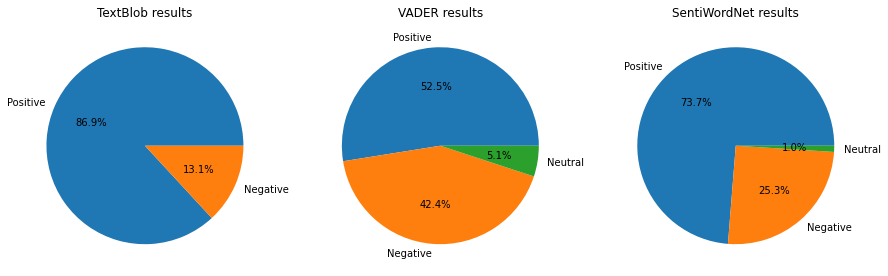

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7f3317ec8810>,
 [Text(0.5194982115931045, 0.9695986840706655, 'Neutral'),
  Text(-1.0977853461644442, -0.06976627943793239, 'Positive'),
  Text(0.5799480152555193, -0.934697972395995, 'Negative')],
 [Text(0.28336266086896605, 0.5288720094930902, '34.3%'),
  Text(-0.5987920069987877, -0.0380543342388722, '33.3%'),
  Text(0.31633528104846503, -0.5098352576705426, '32.3%')])

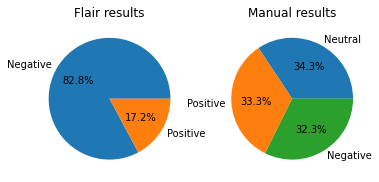

In [74]:
plt.subplot(1,2,1)
plt.title("Flair results")
plt.pie(flair_counts.values, labels = flair_counts.index, autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("Manual results")
plt.pie(label_counts.values, labels = label_counts.index, autopct='%1.1f%%', shadow=False)
